In [35]:
import numpy as np
import utils
import os
import pickle
import os
import argparse
import time
import pickle

# 3rd party libraries
import numpy as np                              # this comes with Anaconda
import pandas as pd                             # this comes with Anaconda
import matplotlib.pyplot as plt                 # this comes with Anaconda
from scipy.optimize import approx_fprime        # this comes with Anaconda
from sklearn.tree import DecisionTreeClassifier # if using Anaconda, install with `conda install scikit-learn`
""" NOTE:
Python is nice, but it's not perfect. One horrible thing about Python is that a 
package might use different names for installation and importing. For example, 
seeing code with `import sklearn` you might sensibly try to install the package 
with `conda install sklearn` or `pip install sklearn`. But, in fact, the actual 
way to install it is `conda install scikit-learn` or `pip install scikit-learn`.
Wouldn't it be lovely if the same name was used in both places, instead of 
`sklearn` and then `scikit-learn`? Please be aware of this annoying feature. 
"""

# CPSC 340 code
import utils
import grads
from decision_stump import DecisionStumpEquality, DecisionStumpErrorRate, DecisionStumpInfoGain
from decision_tree import DecisionTree


class DecisionStumpEquality:

    def __init__(self):
        pass


    def fit(self, X, y):
        N, D = X.shape

        # Get an array with the number of 0's, number of 1's, etc.
        count = np.bincount(y)    
        
        # Get the index of the largest value in count.  
        # Thus, y_mode is the mode (most popular value) of y
        y_mode = np.argmax(count) 

        self.splitSat = y_mode
        self.splitNot = None
        self.splitVariable = None
        self.splitValue = None

        # If all the labels are the same, no need to split further
        if np.unique(y).size <= 1:
            return

        minError = np.sum(y != y_mode)

        # Loop over features looking for the best split
        X = np.round(X)

        for d in range(D):
            for n in range(N):
                # Choose value to equate to
                value = X[n, d]

                # Find most likely class for each split
                y_sat = utils.mode(y[X[:,d] == value])
                y_not = utils.mode(y[X[:,d] != value])

                # Make predictions
                y_pred = y_sat * np.ones(N)
                y_pred[X[:, d] != value] = y_not

                # Compute error
                errors = np.sum(y_pred != y) 

                # Compare to minimum error so far
                if errors < minError:
                    # This is the lowest error, store this value
                    minError = errors
                    self.splitVariable = d
                    self.splitValue = value
                    self.splitSat = y_sat
                    self.splitNot = y_not

    def predict(self, X):

        M, D = X.shape
        X = np.round(X)

        if self.splitVariable is None:
            return self.splitSat * np.ones(M)

        yhat = np.zeros(M)

        for m in range(M):
            if X[m, self.splitVariable] == self.splitValue:
                yhat[m] = self.splitSat
            else:
                yhat[m] = self.splitNot

        return yhat





class DecisionStumpErrorRate:

    def __init__(self):
        pass

    def fit(self, X, y):
        """ YOUR CODE HERE """
        raise NotImplementedError

    def predict(self, X):
        """ YOUR CODE HERE """
        raise NotImplementedError



"""
A helper function that computes the entropy of the 
discrete distribution p (stored in a 1D numpy array).
The elements of p should add up to 1.
This function ensures lim p-->0 of p log(p) = 0
which is mathematically true (you can show this with l'Hopital's rule), 
but numerically results in NaN because log(0) returns -Inf.
"""
def entropy(p):
    plogp = 0*p # initialize full of zeros
    plogp[p>0] = p[p>0]*np.log(p[p>0]) # only do the computation when p>0
    return -np.sum(plogp)
    
# This is not required, but one way to simplify the code is 
# to have this class inherit from DecisionStumpErrorRate.
# Which methods (init, fit, predict) do you need to overwrite?
class DecisionStumpInfoGain(DecisionStumpErrorRate):
    pass # DELETE THIS, IMPLEMENT NEW METHOD(S)




ImportError: cannot import name 'DecisionStumpEquality' from 'decision_stump' (/Users/yuetongliu/Desktop/CPSC340/Assignment/a1/code/decision_stump.py)

In [ ]:
class DecisionStumpErrorRate:

    def __init__(self):
        pass


    def fit(self, X, y):
        N, D = X.shape

        # Get an array with the number of 0's, number of 1's, etc.
        count = np.bincount(y)    
        
        # Get the index of the largest value in count.  
        # Thus, y_mode is the mode (most popular value) of y
        y_mode = np.argmax(count) 

        self.splitSat = y_mode
        self.splitNot = None
        self.splitVariable = None
        self.splitValue = None

        # If all the labels are the same, no need to split further
        if np.unique(y).size <= 1:
            return

        minError = np.sum(y != y_mode)

        # Loop over features looking for the best split
        X = np.round(X)

        for d in range(D):
            for n in range(N):
                # Choose value to equate to
                value = X[n, d]

                # Find most likely class for each split
                y_sat = utils.mode(y[X[:,d] > value])
                y_not = utils.mode(y[X[:,d] <= value])

                # Make predictions
                y_pred = y_sat * np.ones(N)
                y_pred[X[:, d] != value] = y_not

                # Compute error
                errors = np.sum(y_pred != y)

                # Compare to minimum error so far
                if errors < minError:
                    # This is the lowest error, store this value
                    minError = errors
                    self.splitVariable = d
                    self.splitValue = value
                    self.splitSat = y_sat
                    self.splitNot = y_not

    def predict(self, X):

        M, D = X.shape
        X = np.round(X)

        if self.splitVariable is None:
            return self.splitSat * np.ones(M)

        yhat = np.zeros(M)

        for m in range(M):
            if X[m, self.splitVariable] == self.splitValue:
                yhat[m] = self.splitSat
            else:
                yhat[m] = self.splitNot

        return yhat

In [ ]:
# Load citiesSmall dataset
with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
        dataset = pickle.load(f)

X = dataset["X"]
y = dataset["y"]

        # Evaluate decision stump
model = DecisionStumpErrorRate()
model.fit(X, y)
y_pred = model.predict(X)

error = np.mean(y_pred != y)
print("Decision Stump with inequality rule error: %.3f" % error)

        # Plot result
utils.plotClassifier(model, X, y)

# fname = os.path.join("..", "figs", "q6_2_decisionBoundary.pdf")
#plt.savefig(fname)
# print("\nFigure saved as '%s'" % fname)

In [31]:
def entropy(p):
    plogp = 0*p # initialize full of zeros
    plogp[p>0] = p[p>0]*np.log(p[p>0]) # only do the computation when p>0
    return -np.sum(plogp)

    
# This is not required, but one way to simplify the code is 
# to have this class inherit from DecisionStumpErrorRate.
# Which methods (init, fit, predict) do you need to overwrite?
class DecisionStumpInfoGain(DecisionStumpErrorRate):
    def __init__(self):
        pass


    def fit(self, X, y):
        N, D = X.shape

        # Get an array with the number of 0's, number of 1's, etc.
        count = np.bincount(y)    
        
        # Get the index of the largest value in count.  
        # Thus, y_mode is the mode (most popular value) of y
        y_mode = np.argmax(count) 

        self.splitSat = y_mode
        self.splitNot = None
        self.splitVariable = None
        self.splitValue = None

        # If all the labels are the same, no need to split further
        if np.unique(y).size <= 1:
            return

        minError = 0

        # Loop over features looking for the best split
        X = np.round(X)

        for d in range(D):
            for n in range(N):
                # Choose value to equate to
                value = X[n, d]

                # Find most likely class for each split
                y_sat = utils.mode(y[X[:,d] > value])
                y_not = utils.mode(y[X[:,d] <= value])

                # Make predictions
                y_pred = y_sat * np.ones(N)
                y_pred[X[:, d] != value] = y_not

                # Compute error
                errors = np.sum(y_pred != y)
                correct = np.sum(y_pred == y)
                gain = entropy(y)- errors/len(y)*entropy(y_pred[y_pred != y])-correct/len(y)*entropy(y_pred[y_pred == y])

                # Compare to minimum error so far
                if gain < minError:
                    # This is the lowest error, store this value
                    minError = gain
                    self.splitVariable = d
                    self.splitValue = value
                    self.splitSat = y_sat
                    self.splitNot = y_not

    def predict(self, X):

        M, D = X.shape
        X = np.round(X)

        if self.splitVariable is None:
            return self.splitSat * np.ones(M)

        yhat = np.zeros(M)

        for m in range(M):
            if X[m, self.splitVariable] == self.splitValue:
                yhat[m] = self.splitSat
            else:
                yhat[m] = self.splitNot

        return yhat

Decision Stump with inequality rule error: 0.415


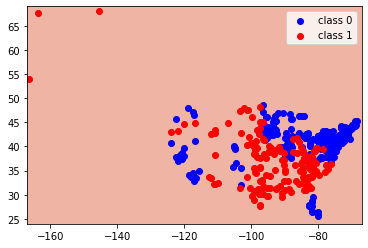

In [32]:
# Load citiesSmall dataset
with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
        dataset = pickle.load(f)

X = dataset["X"]
y = dataset["y"]

        # Evaluate decision stump
model = DecisionStumpInfoGain()
model.fit(X, y)
y_pred = model.predict(X)

error = np.mean(y_pred != y)
print("Decision Stump with inequality rule error: %.3f" % error)

        # Plot result
utils.plotClassifier(model, X, y)

In [33]:
import numpy as np
from decision_stump import DecisionStumpErrorRate

class DecisionTree:

    def __init__(self, max_depth, stump_class=DecisionStumpErrorRate):
        self.max_depth = max_depth
        self.stump_class = stump_class
    

    def fit(self, X, y):
        # Fits a decision tree using greedy recursive splitting
        N, D = X.shape
        
        # Learn a decision stump
        splitModel = self.stump_class()
        splitModel.fit(X, y)

        if self.max_depth <= 1 or splitModel.splitVariable is None:
            # If we have reached the maximum depth or the decision stump does
            # nothing, use the decision stump

            self.splitModel = splitModel
            self.subModel1 = None
            self.subModel0 = None
            return
        
        # Fit a decision tree to each split, decreasing maximum depth by 1
        j = splitModel.splitVariable
        value = splitModel.splitValue

        # Find indices of examples in each split
        splitIndex1 = X[:,j] > value
        splitIndex0 = X[:,j] <= value

        # Fit decision tree to each split
        self.splitModel = splitModel
        self.subModel1 = DecisionTree(self.max_depth-1, stump_class=self.stump_class)
        self.subModel1.fit(X[splitIndex1], y[splitIndex1])
        self.subModel0 = DecisionTree(self.max_depth-1, stump_class=self.stump_class)
        self.subModel0.fit(X[splitIndex0], y[splitIndex0])


    def predict(self, X):
        M, D = X.shape
        y = np.zeros(M)

        # GET VALUES FROM MODEL
        splitVariable = self.splitModel.splitVariable
        splitValue = self.splitModel.splitValue
        splitSat = self.splitModel.splitSat

        if splitVariable is None:
            # If no further splitting, return the majority label
            y = splitSat * np.ones(M)

        # the case with depth=1, just a single stump.
        elif self.subModel1 is None:
            return self.splitModel.predict(X)

        else:
            # Recurse on both sub-models
            j = splitVariable
            value = splitValue

            splitIndex1 = X[:,j] > value
            splitIndex0 = X[:,j] <= value

            y[splitIndex1] = self.subModel1.predict(X[splitIndex1])
            y[splitIndex0] = self.subModel0.predict(X[splitIndex0])

        return y
        

Error: 0.415

Figure saved as '../figs/q6_4_decisionBoundary.pdf'


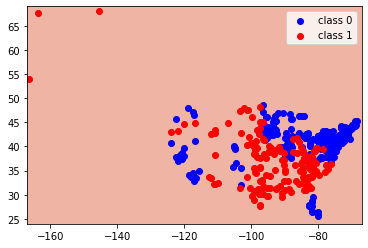

In [34]:
with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
        dataset = pickle.load(f)

X = dataset["X"]
y = dataset["y"]

model = DecisionTree(max_depth=2,stump_class=DecisionStumpInfoGain)
model.fit(X, y)

y_pred = model.predict(X)
error = np.mean(y_pred != y)

print("Error: %.3f" % error)
        
utils.plotClassifier(model, X, y)

fname = os.path.join("..", "figs", "q6_4_decisionBoundary.pdf")
plt.savefig(fname)
print("\nFigure saved as '%s'" % fname)

In [36]:
with open(os.path.join('..','data','citiesSmall.pkl'), 'rb') as f:
            dataset = pickle.load(f)
        
X = dataset["X"]
y = dataset["y"]
print("n = %d" % X.shape[0])

depths = np.arange(1,15) # depths to try


        
        
t = time.time()
my_tree_errors = np.zeros(depths.size)
for i, max_depth in enumerate(depths):
    model = DecisionTree(max_depth=max_depth)
    model.fit(X, y)
    y_pred = model.predict(X)
    my_tree_errors[i] = np.mean(y_pred != y)
print("Our decision tree with DecisionStumpErrorRate took %f seconds" % (time.time()-t))
        
plt.plot(depths, my_tree_errors, label="errorrate")
        
        
t = time.time()
my_tree_errors_infogain = np.zeros(depths.size)
for i, max_depth in enumerate(depths):
        model = DecisionTree(max_depth=max_depth,stump_class=DecisionStumpInfoGain)
        model.fit(X, y)
        y_pred = model.predict(X)
        my_tree_errors_infogain[i] = np.mean(y_pred != y)
print("Our decision tree with DecisionStumpInfoGain took %f seconds" % (time.time()-t))
        
plt.plot(depths, my_tree_errors_infogain, label="infogain")

t = time.time()
sklearn_tree_errors = np.zeros(depths.size)
for i, max_depth in enumerate(depths):
        model = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=1)
        model.fit(X, y)
        y_pred = model.predict(X)
        sklearn_tree_errors[i] = np.mean(y_pred != y)
print("scikit-learn's decision tree took %f seconds" % (time.time()-t))

plt.plot(depths, sklearn_tree_errors, label="sklearn", linestyle=":", linewidth=3)

plt.xlabel("Depth of tree")
plt.ylabel("Classification error")
plt.legend()
fname = os.path.join("..", "figs", "q6_5_tree_errors.pdf")
plt.savefig(fname)


n = 400


ValueError: attempt to get argmax of an empty sequence